In [19]:
x=c(rep(160,5),rep(180,5),rep(200,5),rep(220,5))
y=c(575,542,530,539,570,565,593,590,579,610,600,651,610,637,629,725,700,715,685,710)
ym=matrix(y,byrow=T,4,5)

In [16]:
aov.out=aov(y~factor(x))
summary(aov.out)

            Df Sum Sq Mean Sq F value   Pr(>F)    
factor(x)    3  66871   22290    66.8 2.88e-09 ***
Residuals   16   5339     334                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [37]:
# Output에서 MSE가 334로 나옴.
mse = 334

In [40]:
CIof4=c(apply(ym,1,mean)[4]-abs(qt(0.025,df=20-4)*sqrt(mse/5)),apply(ym,1,mean)[4]+abs(qt(0.025,df=20-4)*sqrt(mse/5)))

In [41]:
CIof4

[1] 689.6737 724.3263

In [24]:
# 고정효과의 총합은 0
sum(apply(ym,1,mean)-mean(y))==0

[1] TRUE

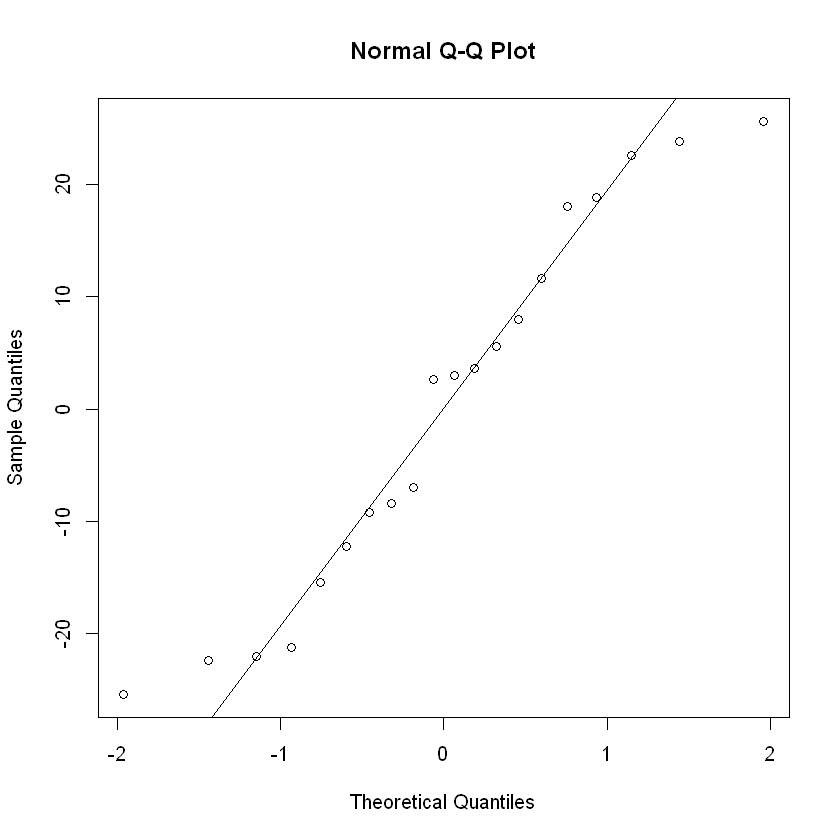

In [60]:
qqnorm(aov.out$residuals)
qqline(aov.out$residuals)

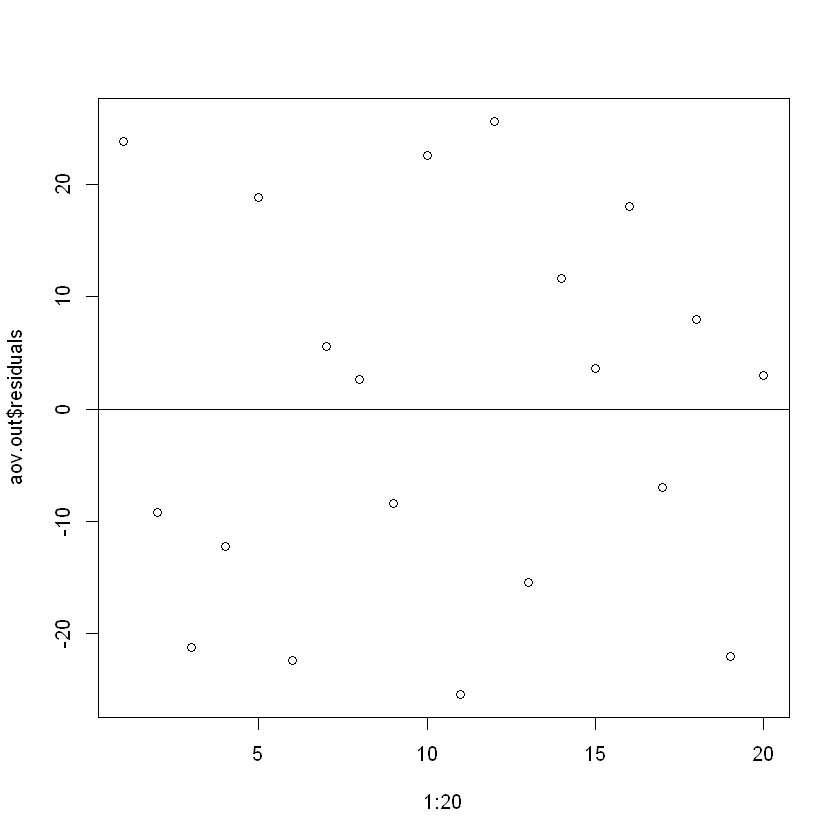

In [63]:
plot(1:20,aov.out$residuals)
abline(h=0)

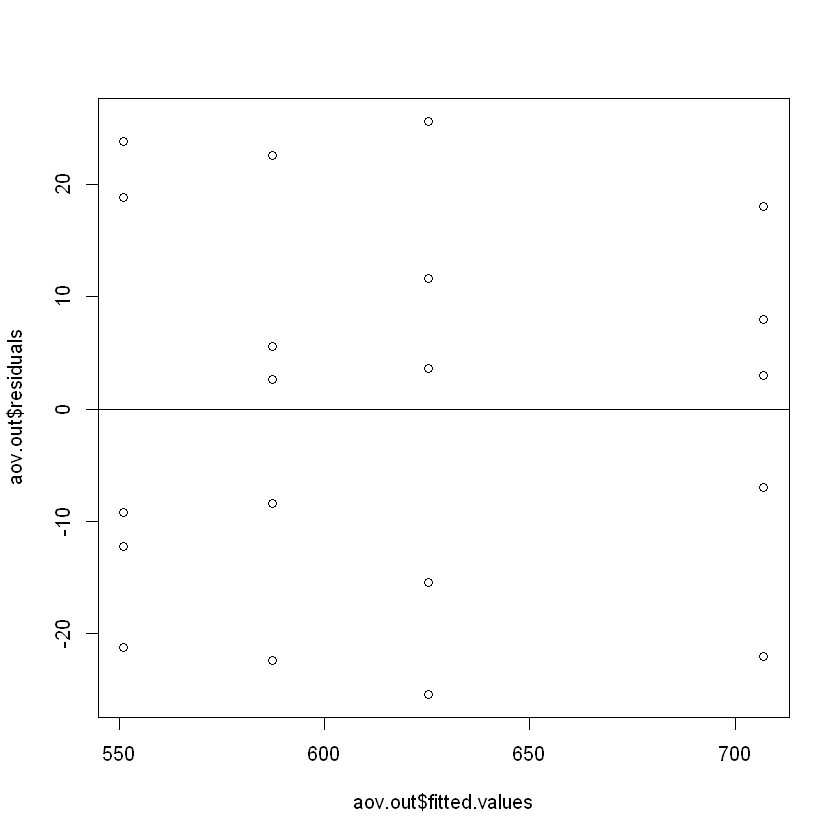

In [65]:
plot(aov.out$fitted.values,aov.out$residuals)
abline(h=0)

In [71]:
sp=sum(4*apply(ym,1,var))/16

In [72]:
sp

[1] 333.7

In [93]:
q=16*log10(sp)-4*sum(log10(apply(ym,1,var)))
c=1+1/(3*3)*(4/4-1/16)
2.3026*q/c

[1] 0.4334905

In [74]:
# 분산의 동질성 검정 - bartlett-test
bartlett.test(y,factor(x))


	Bartlett test of homogeneity of variances

data:  y and factor(x)
Bartlett's K-squared = 0.43349, df = 3, p-value = 0.9332


In [94]:
# contrasts anova
contrastnull=cbind(c(1,-1,0,0),
c(1,1,-1,-1),
c(0,0,1,-1))
contrastnull
data=data.frame(y,x)
data$x=factor(data$x)
contrasts(data$x)<-contrastnull
model1 <- aov(y ~ x, data = data)
summary.aov(model1, split=list(x=list("u1 vs. u2"=1, "u1 + u2 vs u3 + u4" = 2, "u3 vs u4"=3))) 

In [120]:
LSD=abs(qt(0.025,16))*sqrt(2*mse/5)

In [118]:
ymeans=apply(ym,1,mean)
diffs=c()
for(i in 1:3){
    for (j in (i+1):4){
        print(ymeans[i]-ymeans[j])
        diffs=c(diffs,ymeans[i]-ymeans[j])
    }    
}

[1] -36.2
[1] -74.2
[1] -155.8
[1] -38
[1] -119.6
[1] -81.6


In [122]:
abs(diffs)>LSD
# 모든 그룹의 평균차이가 있음.

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [2]:
DC=c(118.8, 122.6, 115.6, 113.6, 119.5, 115.9, 115.8, 115.1, 116.9, 115.4, 115.6, 107.9) 
DCnMC=c(105.4, 101.1, 102.7, 97.1, 101.9, 98.9, 100.0, 99.8, 102.6, 100.9, 104.5, 93.5) 
MC= c(102.1, 105.8, 99.6, 102.7, 98.8, 100.9, 102.8, 98.7, 94.7, 97.8, 99.7, 98.6)

In [4]:
choco=c(DC,DCnMC,MC)

In [25]:
X=c(rep("DC",12),rep("DCnMC",12),rep("MC",12))

In [26]:
X=factor(X)

In [27]:
chocoaov=aov(choco~X)
summary(chocoaov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
X            2 1952.6   976.3   93.58 2.52e-14 ***
Residuals   33  344.3    10.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
library(agricolae)

In [29]:
out=LSD.test(chocoaov,"X")
out

$statistics
      Mean       CV  MSerror      LSD
  105.6472 3.057434 10.43351 2.682876

$parameters
  Df ntr  t.value alpha       test name.t
  33   3 2.034515  0.05 Fisher-LSD      X

$means
         choco      std  r       LCL      UCL   Min   Max
DC    116.0583 3.533337 12 114.16125 117.9554 107.9 122.6
DCnMC 100.7000 3.235035 12  98.80292 102.5971  93.5 105.4
MC    100.1833 2.889742 12  98.28625 102.0804  94.7 105.8

$comparison
NULL

$groups
    trt    means M
1    DC 116.0583 a
2 DCnMC 100.7000 b
3    MC 100.1833 b


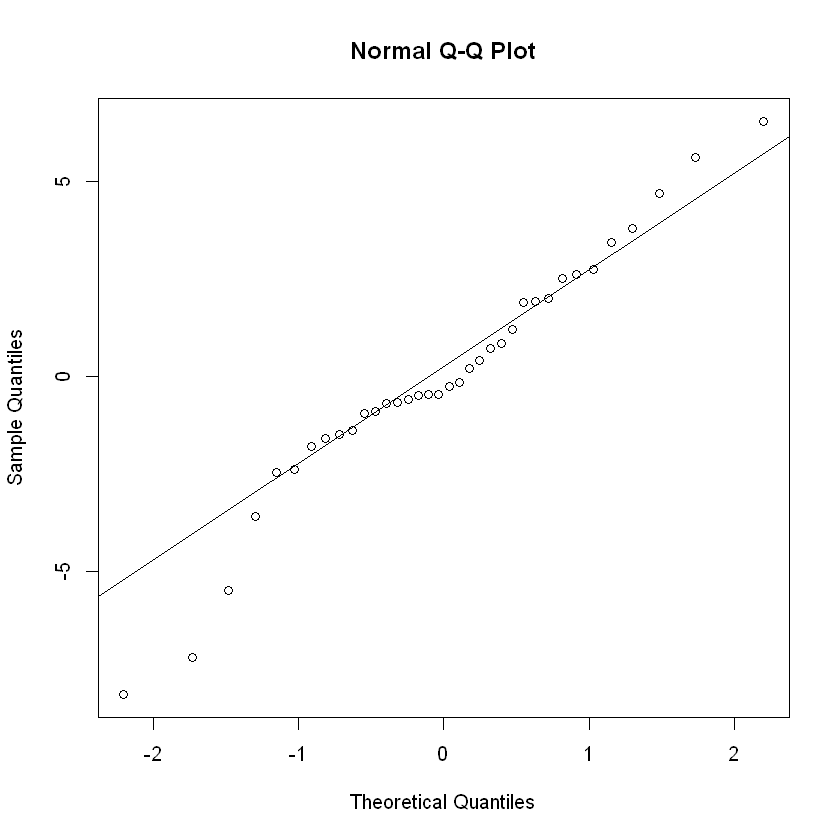

In [33]:
qqnorm(chocoaov$residuals)
qqline(chocoaov$residuals)

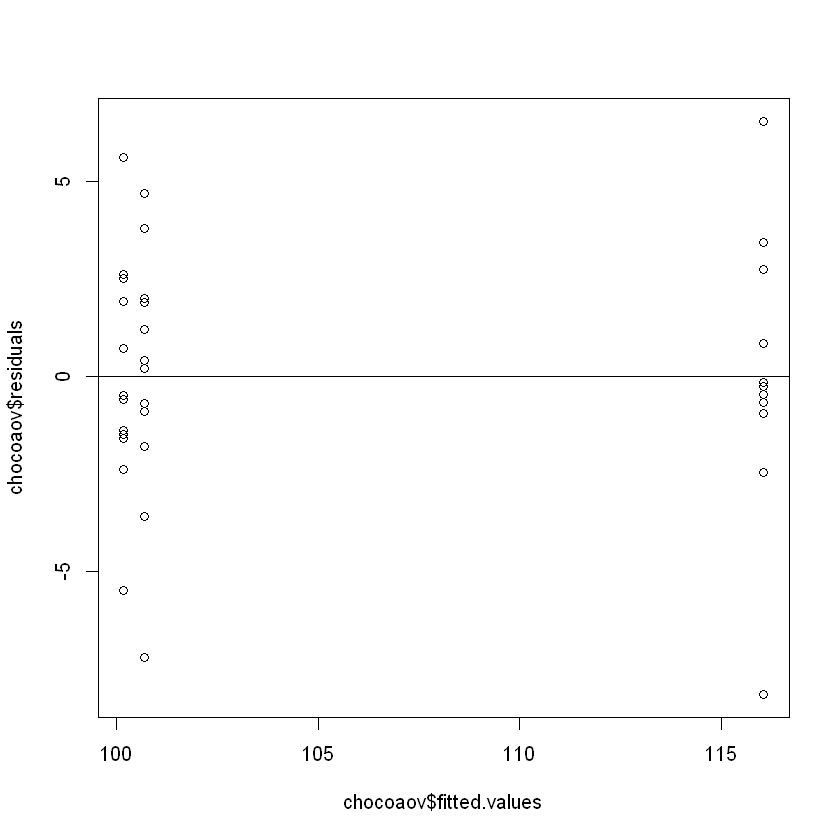

In [35]:
plot(chocoaov$fitted.values,chocoaov$residuals)
abline(h=0)